In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import datetime
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

In [82]:
forecast_weather = pd.read_csv('C:\\Users\\user\\github\\Data\\capstone\\weather/solar_forecast_weather.csv')

In [83]:
solar = pd.read_csv('C:\\Users\\user\\github\\Data\\capstone\\weather/solar_power_2204.csv')

In [84]:
real_weather = pd.read_csv('C:\\Users\\user\\github\\Data\\capstone\\weather/weather_solar_actual.csv')

In [85]:
forecast_weather

,Forecast time,forecast,temperature,humidity,windspeed,winddirection
0,2020-09-01 11:00:00,4.0,31.0,65.0,3.0,101.0
1,2020-09-01 11:00:00,7.0,29.0,80.0,2.4,90.0
2,2020-09-01 11:00:00,10.0,26.0,90.0,1.7,65.0
3,2020-09-01 11:00:00,13.0,26.0,90.0,1.5,48.0
4,2020-09-01 11:00:00,16.0,25.0,90.0,1.6,40.0
...,...,...,...,...,...,...
230259,2022-07-01 08:00:00,60.0,26.0,80.0,2.5,78.0
230260,2022-07-01 08:00:00,61.0,26.0,85.0,2.1,76.0
230261,2022-07-01 08:00:00,62.0,25.0,85.0,1.7,65.0
230262,2022-07-01 08:00:00,63.0,25.0,85.0,1.6,43.0


In [86]:
forecast_weather['Forecast time'] = pd.to_datetime(forecast_weather['Forecast time'])

In [87]:
real_weather = real_weather.iloc[:,2:]

In [88]:
real_weather.columns = ['date','temp','wind_speed','wind_dir','humidity']

In [89]:
forecast_weather['real_time'] = ''

In [90]:
for i in range(len(forecast_weather)):
    forecast_weather['real_time'][i] = forecast_weather['Forecast time'][i] + datetime.timedelta(hours=forecast_weather['forecast'][i])

In [91]:
forecast_weather_eda = forecast_weather.groupby(['real_time']).mean().drop('forecast', axis=1)

In [92]:
from scipy import interpolate

In [93]:
forecast_weather_eda.reset_index(inplace=True)

In [94]:
forecast_weather_eda

,real_time,temperature,humidity,windspeed,winddirection
0,2020-09-01 15:00:00,31.0,65.000000,3.00,101.000000
1,2020-09-01 18:00:00,29.0,80.000000,2.40,90.000000
2,2020-09-01 21:00:00,26.0,90.000000,1.80,66.333333
3,2020-09-02 00:00:00,25.5,90.000000,1.75,48.000000
4,2020-09-02 03:00:00,25.0,90.000000,1.90,44.200000
...,...,...,...,...,...
11236,2022-07-03 20:00:00,26.0,80.000000,2.50,78.000000
11237,2022-07-03 21:00:00,26.0,81.666667,2.10,76.000000
11238,2022-07-03 22:00:00,25.0,85.000000,1.70,65.000000
11239,2022-07-03 23:00:00,25.0,85.000000,1.60,43.000000


In [95]:
forecast_weather_eda

,real_time,temperature,humidity,windspeed,winddirection
0,2020-09-01 15:00:00,31.0,65.000000,3.00,101.000000
1,2020-09-01 18:00:00,29.0,80.000000,2.40,90.000000
2,2020-09-01 21:00:00,26.0,90.000000,1.80,66.333333
3,2020-09-02 00:00:00,25.5,90.000000,1.75,48.000000
4,2020-09-02 03:00:00,25.0,90.000000,1.90,44.200000
...,...,...,...,...,...
11236,2022-07-03 20:00:00,26.0,80.000000,2.50,78.000000
11237,2022-07-03 21:00:00,26.0,81.666667,2.10,76.000000
11238,2022-07-03 22:00:00,25.0,85.000000,1.70,65.000000
11239,2022-07-03 23:00:00,25.0,85.000000,1.60,43.000000


In [96]:
forecast_weather

,Forecast time,forecast,temperature,humidity,windspeed,winddirection,real_time
0,2020-09-01 11:00:00,4.0,31.0,65.0,3.0,101.0,2020-09-01 15:00:00
1,2020-09-01 11:00:00,7.0,29.0,80.0,2.4,90.0,2020-09-01 18:00:00
2,2020-09-01 11:00:00,10.0,26.0,90.0,1.7,65.0,2020-09-01 21:00:00
3,2020-09-01 11:00:00,13.0,26.0,90.0,1.5,48.0,2020-09-02 00:00:00
4,2020-09-01 11:00:00,16.0,25.0,90.0,1.6,40.0,2020-09-02 03:00:00
...,...,...,...,...,...,...,...
230259,2022-07-01 08:00:00,60.0,26.0,80.0,2.5,78.0,2022-07-03 20:00:00
230260,2022-07-01 08:00:00,61.0,26.0,85.0,2.1,76.0,2022-07-03 21:00:00
230261,2022-07-01 08:00:00,62.0,25.0,85.0,1.7,65.0,2022-07-03 22:00:00
230262,2022-07-01 08:00:00,63.0,25.0,85.0,1.6,43.0,2022-07-03 23:00:00


In [97]:
solar['datetime'] = pd.to_datetime(solar['datetime'])

In [98]:
solar.target.replace(65535.0, solar.target.mean(), inplace=True)

In [99]:
solar['month'] = solar.datetime.dt.month
solar['hour'] = solar.datetime.dt.hour
solar['year'] = solar.datetime.dt.year
solar['day'] = solar.datetime.dt.day

In [100]:
solar_eda = solar.groupby(['year','month','day','hour']).mean().reset_index()

In [101]:
solar_eda[['year','month','day','hour']] = solar_eda[['year','month','day','hour']].astype('str')

In [102]:
solar_eda['date'] = (solar_eda.year + '-' + solar_eda.month + '-' + solar_eda.day + ' ' + solar_eda.hour + ':00')

In [103]:
solar_eda.date = pd.to_datetime(solar_eda.date)

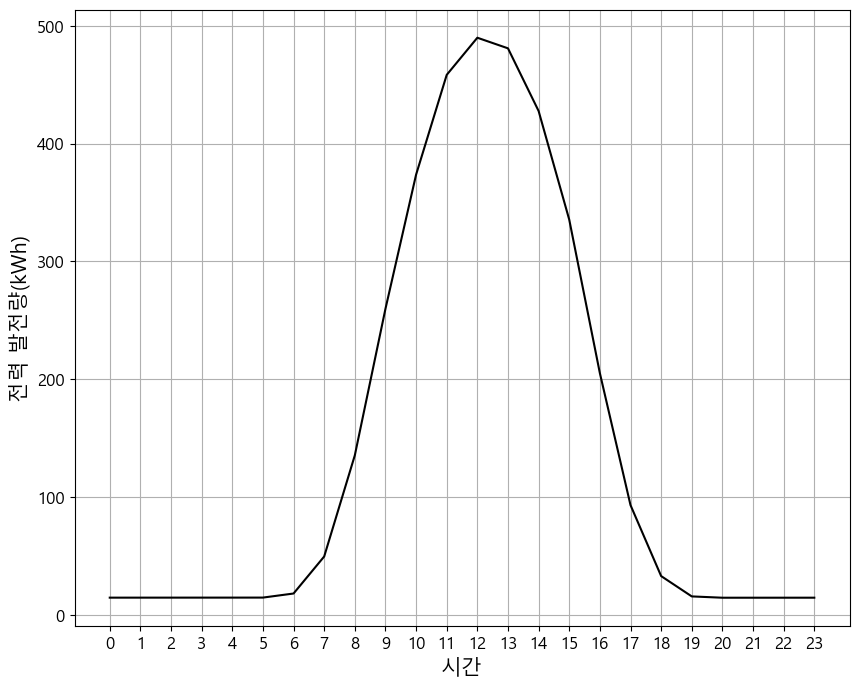

In [104]:
ee = solar.groupby(['hour']).mean().target
plt.figure(figsize=(10,8))
plt.plot(ee, color = 'k')
plt.grid(True)
plt.yticks(fontsize = 12)
plt.xticks(np.arange(0,24,1) , fontsize = 12)
plt.xlabel('시간', fontsize = 15)
plt.ylabel('전력 발전량(kWh)', fontsize = 15)
plt.show()

In [105]:
solar_eda = solar_eda.set_index('date')

In [106]:
real_weather = real_weather.set_index('date')

In [107]:
forecast_weather_eda.set_index('real_time', inplace=True)

In [108]:
forecast_x = forecast_weather_eda.loc[solar_eda.index[0]:solar_eda.index[-1]]

In [109]:
real_weather.index = pd.to_datetime(real_weather.index)

In [110]:
real_x = real_weather.loc[solar_eda.index[0]:solar_eda.index[-1]]

In [111]:
solar_eda = solar_eda.fillna(0)

In [112]:
from sklearn.preprocessing import StandardScaler 

In [113]:
sc = StandardScaler()

In [114]:
solar_eda

,year,month,day,hour,target
date,,,,,
2020-09-10 00:00:00,2020,9,10,0,0.00
2020-09-10 01:00:00,2020,9,10,1,0.00
2020-09-10 02:00:00,2020,9,10,2,0.00
2020-09-10 03:00:00,2020,9,10,3,0.00
2020-09-10 04:00:00,2020,9,10,4,0.00
...,...,...,...,...,...
2022-04-30 19:00:00,2022,4,30,19,0.85
2022-04-30 20:00:00,2022,4,30,20,0.00
2022-04-30 21:00:00,2022,4,30,21,0.00


In [115]:
real_x = pd.DataFrame(sc.fit_transform(real_x), columns=['temp','wind_speed','wind_dir','humidity'])
solar_eda = pd.DataFrame(sc.fit_transform(solar_eda), columns = ['year','month','day','hour','target'])

In [116]:
real_x['hour'] = solar_eda.hour

In [200]:
real_x

,temp,wind_speed,wind_dir,humidity,hour
0,0.868474,0.232109,-0.309058,1.542833,-1.661325
1,0.868474,0.691426,-0.309058,1.656865,-1.516862
2,0.888047,-0.030358,-0.309058,1.656865,-1.372399
3,0.907619,0.494576,-0.309058,1.656865,-1.227936
4,0.897833,-0.227208,-0.309058,1.770896,-1.083473
...,...,...,...,...,...
14347,0.036646,0.100876,0.341119,0.972676,1.083473
14348,-0.012285,0.297726,0.526883,1.086708,1.227936
14349,-0.022071,-0.358441,0.526883,1.314771,1.372399
14350,-0.022071,-0.161591,0.526883,1.314771,1.516862


In [117]:
y = solar_eda.target

In [118]:
train_x = real_x.iloc[:int(len(real_x)*0.95),:]
test_x = real_x.iloc[int(len(real_x)*0.95):,:]

In [119]:
train_y = y.iloc[:int(len(y)*0.95)]
test_y = y.iloc[int(len(y)*0.95):]

In [120]:
import pvlib
from pvlib import clearsky, atmosphere, solarposition
from pvlib.location import Location
from pvlib.iotools import read_tmy3

In [121]:
latitude = 37.456
longitude = 126.705

In [122]:
tus = Location(latitude, longitude, 'ROK')

In [123]:
time = pd.date_range(start=forecast_weather_eda.index.min(), end = forecast_weather_eda.index.max(), freq='H', tz = tus.tz)

In [124]:
cs = tus.get_clearsky(time)

In [125]:
cs

,ghi,dni,dhi
2020-09-01 15:00:00+09:00,672.205540,763.020810,126.066169
2020-09-01 16:00:00+09:00,509.779364,695.181238,111.699856
2020-09-01 17:00:00+09:00,313.589459,565.928253,89.242537
2020-09-01 18:00:00+09:00,109.238226,298.243072,49.738810
2020-09-01 19:00:00+09:00,0.010326,0.070536,0.010165
...,...,...,...
2022-07-03 20:00:00+09:00,0.000000,0.000000,0.000000
2022-07-03 21:00:00+09:00,0.000000,0.000000,0.000000
2022-07-03 22:00:00+09:00,0.000000,0.000000,0.000000
2022-07-03 23:00:00+09:00,0.000000,0.000000,0.000000


<Axes: >

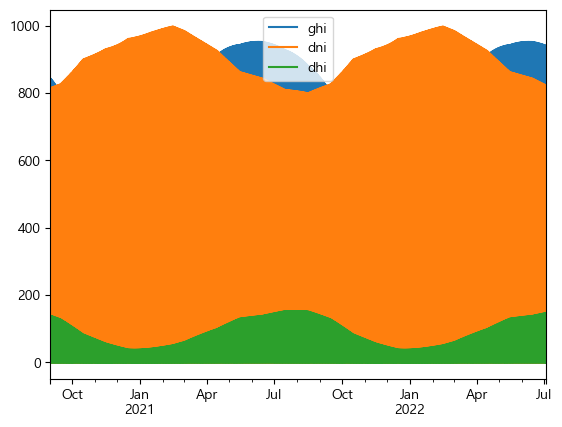

In [126]:
cs.plot()

<Axes: >

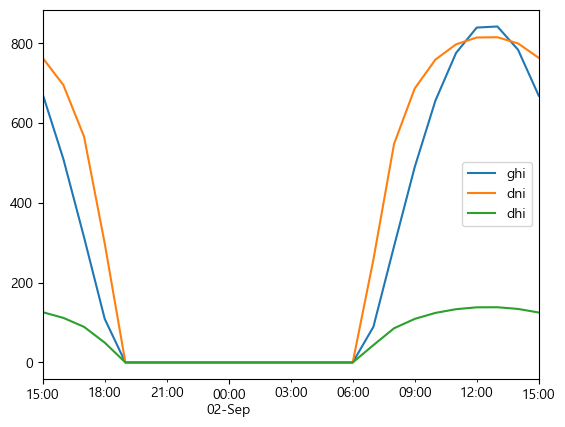

In [127]:
cs.iloc[:25,:].plot()

### DNI : Direct normal irradiance
### DHI : Diffuse horizontal irradiance
### GHI : Global solar radiation on a horizontal irradiance

---
# LSTM model

In [128]:
x_test = tf.convert_to_tensor(test_x.values, dtype=tf.float32)
x_train = tf.convert_to_tensor(train_x.values, dtype=tf.float32)

In [129]:
y_test = tf.convert_to_tensor(test_y.values, dtype=tf.float32)
y_train = tf.convert_to_tensor(train_y.values, dtype=tf.float32)

In [130]:
x_tr = tf.reshape(x_train, (-1, 1, 5))
y_tr = tf.reshape(y_train, (-1, 1, 1))

x_te = tf.reshape(x_test, (-1, 1, 5))

In [260]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(8, input_shape=(1,5), return_sequences=True))
model.add(tf.keras.layers.LSTM(16))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1))

In [261]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 1, 8)              448       
                                                                 
 lstm_21 (LSTM)              (None, 16)                1600      
                                                                 
 dropout_3 (Dropout)         (None, 16)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 2,065
Trainable params: 2,065
Non-trainable params: 0
_________________________________________________________________


In [262]:
from keras import optimizers

In [263]:
adam = optimizers.Adam(lr=0.001)

In [264]:
model.compile(loss = 'mse', optimizer = adam)

In [265]:
his = model.fit(x_tr, y_tr, epochs=500)

Epoch 1/500
427/427 [==============================] - 3s 1ms/step - loss: 0.7083
Epoch 2/500
427/427 [==============================] - 1s 1ms/step - loss: 0.3910
Epoch 3/500
427/427 [==============================] - 1s 1ms/step - loss: 0.3352
Epoch 4/500
427/427 [==============================] - 1s 1ms/step - loss: 0.3107
Epoch 5/500
427/427 [==============================] - 1s 1ms/step - loss: 0.3020
Epoch 6/500
427/427 [==============================] - 1s 1ms/step - loss: 0.2984
Epoch 7/500
427/427 [==============================] - 1s 1ms/step - loss: 0.2968
Epoch 8/500
427/427 [==============================] - 1s 1ms/step - loss: 0.2969
Epoch 9/500
427/427 [==============================] - 1s 1ms/step - loss: 0.2910
Epoch 10/500
427/427 [==============================] - 1s 1ms/step - loss: 0.2921
Epoch 11/500
427/427 [==============================] - 1s 1ms/step - loss: 0.2893
Epoch 12/500
427/427 [==============================] - 1s 1ms/step - loss: 0.2899
Epoch 13/500


In [266]:
predict = model.predict(x_te)

23/23 [==============================] - 1s 637us/step


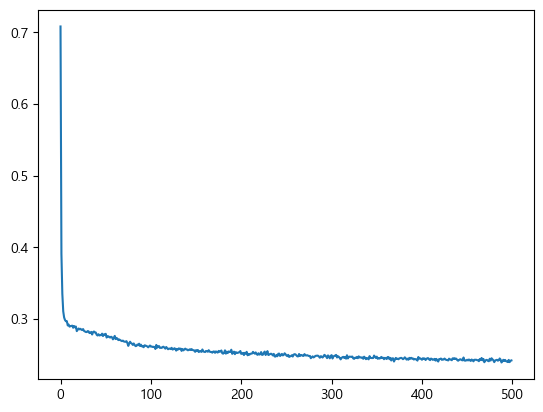

In [267]:
plt.plot(his.history['loss'])

In [268]:
from sklearn.metrics import mean_squared_error

In [269]:
mean_squared_error(y_test, predict)

0.303756

In [270]:
from sklearn.metrics import r2_score

In [271]:
r2_score(y_test, predict)

0.8087118642251425

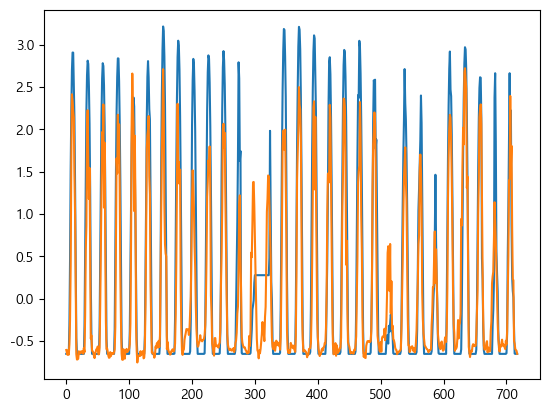

In [272]:
plt.plot(y_test)
plt.plot(predict)

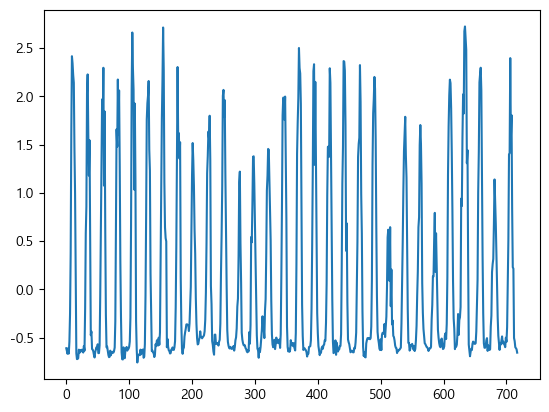

In [273]:
plt.plot(predict.reshape(-1,1))

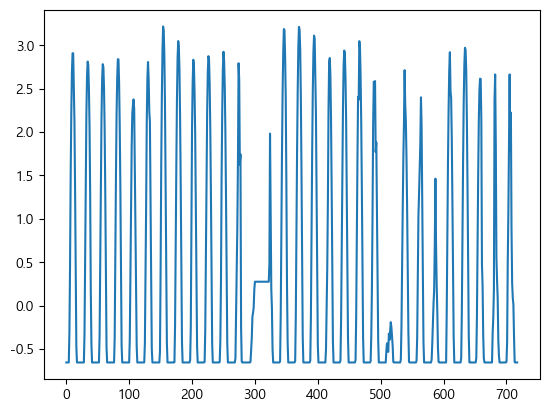

In [274]:
plt.plot(y_test)

---
## ML

In [185]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb

In [186]:
base_reg = DecisionTreeRegressor(max_depth= 7)

In [190]:
model_rf = RandomForestRegressor(n_estimators=200,random_state=0)

In [191]:
model_rf.fit(train_x, train_y)

RandomForestRegressor(n_estimators=200, random_state=0)

In [194]:
predict_rf = model_rf.predict(test_x)

In [193]:
model_rf.score(test_x, test_y)

0.8189589593760289

In [220]:
model_xgb = xgb.XGBRegressor(n_estimators=200,
                learning_rate=0.1,
                max_depth=5,
                subsample=0.3,
                colsample_bytree=0.8,
                objective='reg:squarederror',
                random_state=42)

In [221]:
model_xgb.fit(train_x, train_y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [222]:
y_pred_xgb = model_xgb.predict(test_x)

In [223]:
model_xgb.score(test_x, test_y)

0.8279430676354405

In [235]:
ensemble = (y_pred_xgb + predict.reshape(1,-1) + predict_rf)/3

In [238]:
ensemble[0]

array([-0.63618281, -0.62615099, -0.63895426, -0.65029242, -0.65048582,
       -0.57695588, -0.09147404,  0.55702251,  1.31440286,  2.07681798,
        2.14727636,  2.07831552,  1.97244143,  1.58770152,  0.83426066,
        0.10676622, -0.48623389, -0.64923888, -0.62355215, -0.64058346,
       -0.62794684, -0.59175016, -0.62410369, -0.69343184, -0.64147765,
       -0.66202611, -0.64067732, -0.62380646, -0.60827464, -0.60722732,
       -0.15335727,  0.70418018,  0.7302665 ,  1.91622272,  1.96462814,
        1.75315868,  1.26991944,  1.30942639,  0.6230905 , -0.3070137 ,
       -0.53545899, -0.60165419, -0.62645402, -0.62511224, -0.63556232,
       -0.63175661, -0.64771386, -0.59846922, -0.51226357, -0.48246331,
       -0.39467017, -0.62866233, -0.63532049, -0.59329151, -0.08985861,
        0.79851857,  1.28873723,  1.67026549,  1.72636607,  2.19996241,
        1.30878711,  1.77639544,  0.61105023, -0.0497779 , -0.434625  ,
       -0.50723325, -0.59517428, -0.63005235, -0.60932171, -0.62

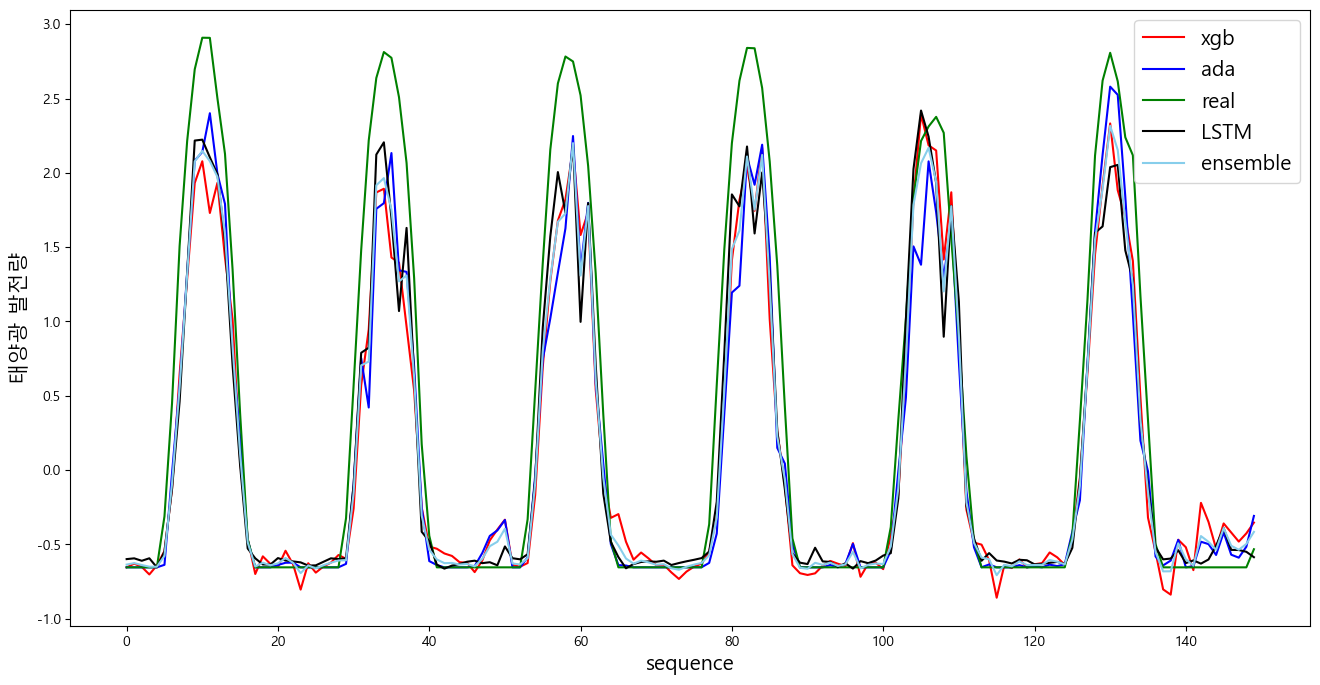

In [240]:
plt.figure(figsize=(16,8))
plt.plot(y_pred_xgb[:150], color = 'r', label = 'xgb')
plt.plot(predict_rf[:150], color = 'b', label = 'ada')
plt.plot(test_y.values[:150], color = 'g', label = 'real')
plt.plot(predict[:150], color = 'k', label = 'LSTM')
plt.plot(ensemble[0][:150], color = 'skyblue', label = 'ensemble')

plt.legend(fontsize = 15)
plt.ylabel('태양광 발전량', fontsize = 15)
plt.xlabel('sequence', fontsize = 15)
plt.show()